Importing all The Required Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Loading The Dataset

In [58]:
df = pd.read_csv("D:\Coding Lab\Data Analytics\Beginner level\EDA\EDA - Red Wine Dataset\winequality-red.csv",sep=";")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Finding The Shape , Columns And Data Types Of The Dataset

In [59]:
print(df.shape)
print(df.columns)
print(df.dtypes)


(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Checking The Null Value

In [60]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Checking Duplicate Values


In [61]:
df.duplicated().sum()


np.int64(240)

Deleting All The Duplicate Values

In [62]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [63]:
df.shape

(1359, 12)

Gaining All The Statistical Knowledge About The Dataset

In [64]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

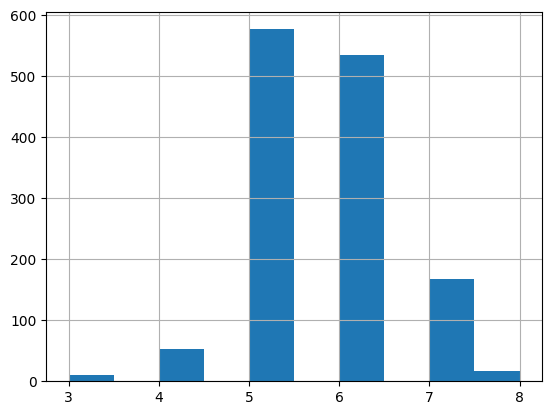

In [65]:
df["quality"].hist(bins=10)

<Axes: xlabel='fixed acidity', ylabel='quality'>

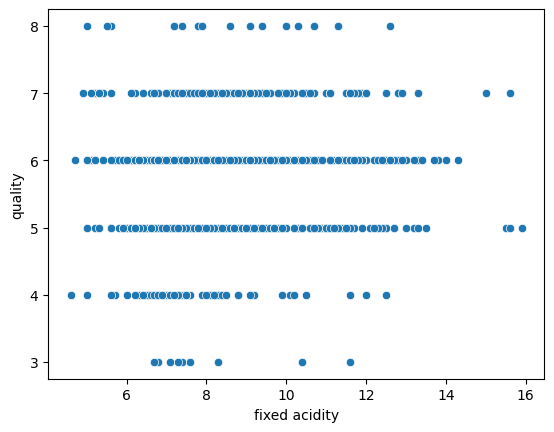

In [66]:
sns.scatterplot(x="fixed acidity" , y="quality" , data=df)

In [67]:
df[["fixed acidity","quality"]].corr()

,fixed acidity,quality
fixed acidity,1.000000,0.119024
quality,0.119024,1.000000


Checking Correlation With The Help Of Heatmap

<Axes: >

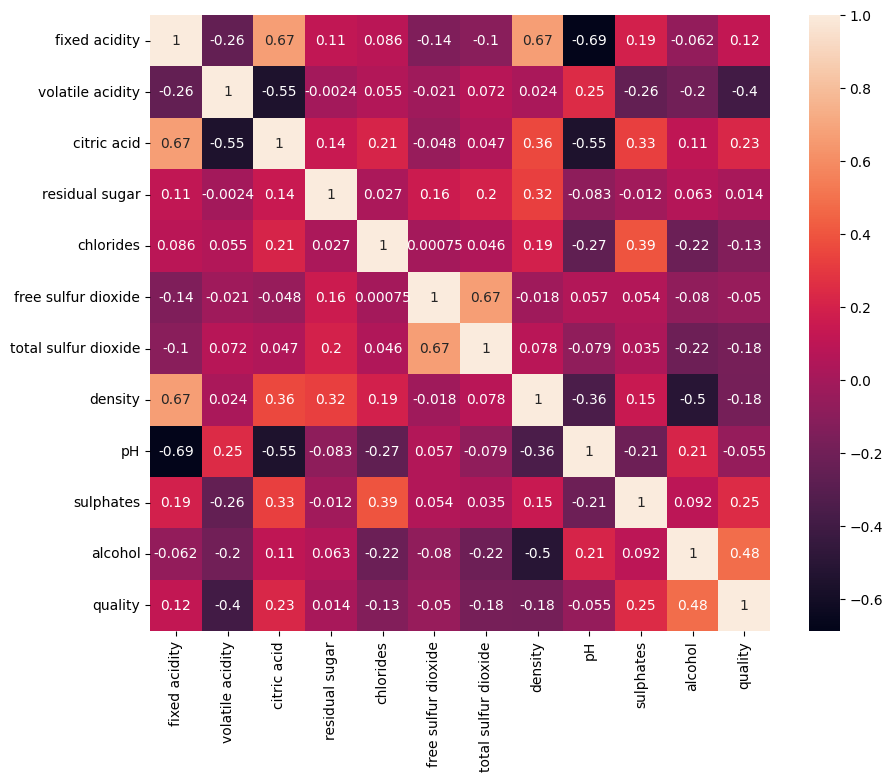

In [68]:
df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Finding Outliers

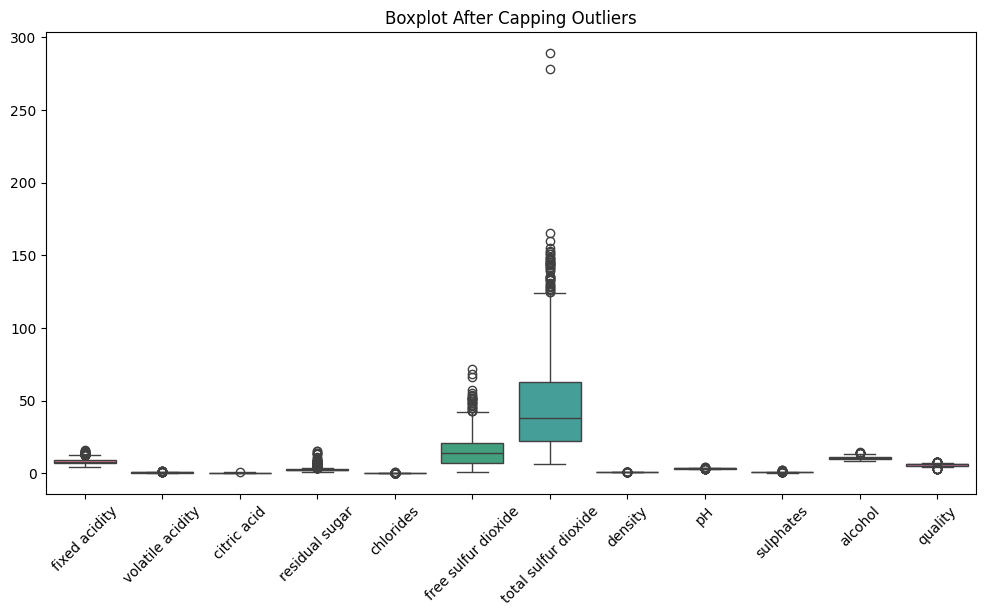

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot After Capping Outliers")
plt.show()

Removing outliers

In [70]:
def cap_outlier_iqr(df , columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df[columns] = df[columns].clip(lower,upper)
    return df

In [71]:
df_cap = df.copy()
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']:
    df_cap = cap_outlier_iqr(df,col)
    
print(df.shape)
print(df_cap.shape)

(1359, 12)
(1359, 12)


Dataset After removing Outliers

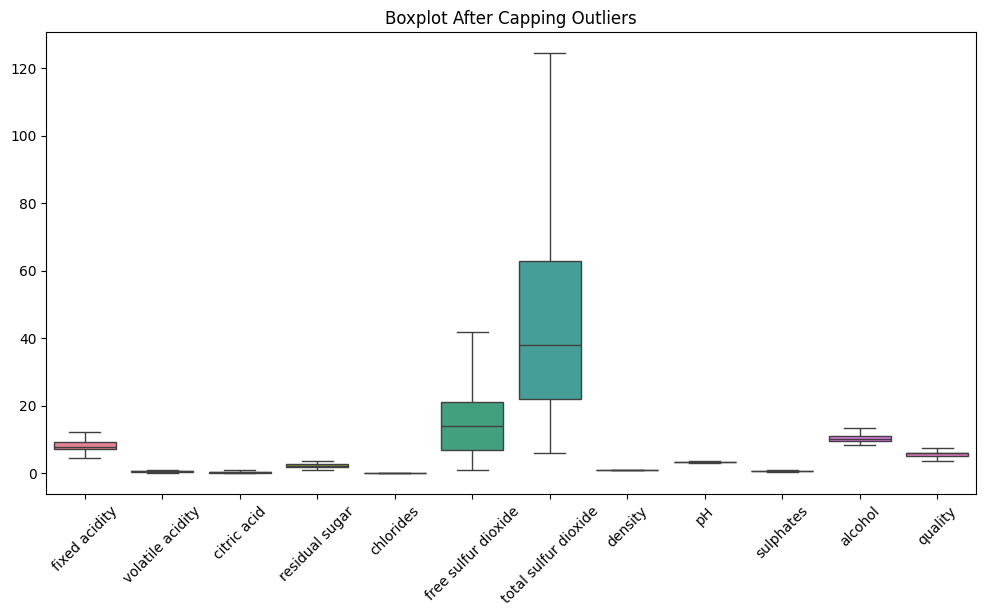

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cap)
plt.xticks(rotation=45)
plt.title("Boxplot After Capping Outliers")
plt.show()

Scaling The Columns Of The Dataset

In [79]:
X = df_cap.drop("quality",axis=1)
y = df_cap["quality"]

scalar = StandardScaler()

X_scaled = scalar.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

X_scaled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.533308,0.971576,-1.394157,-0.698296,-0.288078,-0.478677,-0.391773,0.608506,1.341398,-0.654981,-0.961207
1,-0.292011,1.987398,-1.394157,0.454283,0.902462,0.942785,0.677343,0.051991,-0.726282,0.218684,-0.587463
2,-0.292011,1.310183,-1.189351,-0.039679,0.577769,-0.072545,0.256176,0.163294,-0.326086,0.000268,-0.587463
3,1.759013,-1.398676,1.473125,-0.698296,-0.342194,0.130521,0.450560,0.719809,-0.993080,-0.509370,-0.587463
4,-0.533308,0.745837,-1.394157,-0.862950,-0.342194,-0.275611,-0.197388,0.608506,1.341398,-0.654981,-0.961207
5,-0.231687,0.407230,-1.086948,-1.192258,-0.666887,-0.072545,0.418163,-0.170615,-0.059288,-1.383034,-0.961207
6,-0.593632,0.689403,-1.394157,-1.850874,-0.883348,-0.072545,-0.812940,-1.172342,0.541006,-1.310229,-0.400592
7,-0.292011,0.294361,-1.291754,-0.533642,-0.450425,-0.681743,-0.910132,0.051991,0.340908,-0.582175,-0.867771
8,-0.472984,-0.157116,0.449096,2.183151,-0.558656,0.130521,1.811253,0.608506,0.274209,1.092348,0.066588
9,-0.955578,0.294361,-0.984545,-0.862950,0.848347,-0.072545,0.612548,-0.448873,-0.192687,-0.800591,-1.148078
